# Project Name : *`Human Emotions Detection`*

**Project Title: Emotion Classification Using Image Data**

### Project Description:
In this project, we aim to develop a machine learning model that classifies emotions displayed in images into three categories: **angry**, **sad**, and **happy**. By leveraging labeled image data sourced from Kaggle, the project focuses on training a model capable of interpreting and categorizing emotions based on facial expressions. This system has broad applications in human-computer interaction, mental health monitoring, and social robotics, where understanding human emotions plays a crucial role.

### Objectives:
1. **Data Collection**:
   The dataset contains labeled images categorized into three classes:
   - **Angry**: Images where the subject displays anger.
   - **Sad**: Images where the subject expresses sadness.
   - **Happy**: Images where the subject appears joyful.

   This data serves as the foundation for training and evaluating the model.

2. **Preprocessing and Data Preparation**:
   - **Image Normalization**: Standardizing pixel values to improve model performance.
   - **Augmentation**: Enhancing the dataset by applying transformations such as rotation, flipping, and zooming to improve the model's ability to generalize.
   - **Class Balancing**: Ensuring that the dataset is balanced across the three classes to prevent bias during training.

3. **Model Development**:
   We will design and train a deep learning model capable of emotion classification. The project will explore different architectures, such as:
   - Convolutional Neural Networks (CNNs): Suitable for extracting spatial features from images.
   - Pretrained Models (e.g., VGG, ResNet, EfficientNet): Leveraging transfer learning to improve accuracy and reduce training time.

4. **Evaluation Metrics**:
   The model's performance will be assessed using:
   - **Accuracy**: Overall percentage of correct predictions.
   - **Precision, Recall, and F1-Score**: Class-specific metrics to evaluate performance in imbalanced scenarios.
   - **Confusion Matrix**: For detailed insights into misclassifications.

5. **Deployment**:
   Once the model is trained and evaluated, it will be packaged into a user-friendly application for real-time emotion classification. This may involve deploying the model using platforms like Flask, Gradio, or Streamlit.

### Challenges and Considerations:
- **Variability in Facial Expressions**: Differences in lighting, angle, and individual facial features can affect model performance.
- **Class Imbalance**: If one emotion class dominates the dataset, it may skew the model's predictions.
- **Overfitting**: Risk of overfitting due to limited variability in the training data.
- **Generalization**: Ensuring the model performs well on unseen data.

### Expected Outcomes:
1. A robust model capable of classifying emotions into **angry**, **sad**, or **happy** with high accuracy.
2. Insights into the most significant features or patterns associated with each emotion.
3. A deployable application for real-time emotion recognition, with potential integration into broader systems like mental health monitoring or customer feedback analysis.

### Applications:
- **Mental Health**: Automated emotion detection for identifying individuals in distress.
- **Education**: Understanding student emotions in online learning environments.
- **Customer Interaction**: Enhancing user experience by adapting systems based on emotional cues.
- **Entertainment**: Personalizing content recommendations based on viewer emotions.

This project not only addresses a fascinating computer vision challenge but also contributes to real-world applications where emotional understanding is pivotal.



## 1. Make necessary imports
Let's import the required libaries for performing this task.

In [5]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import time
import random
from google.colab import files
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.cm as cm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


### 1.1 Setup global variables

Let's set some Global Variables that we will be using throughout the project.

In [12]:
# Setup some global variables that we will be using throughout
CLASS_NAMES = ['angry', 'happy','sad']
CONFIGURATION = {
    'BATCH_SIZE' : 32,
    'IM_SIZE' : 256
}

## 2. Get the Data

The dataset is provided on Kaggle by Mohammed Muhammadhananasghar. Please find the link below:

Dataset URL: https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

Dataset URL: https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes
License(s): unknown
 98% 302M/309M [00:03<00:00, 105MB/s] 
100% 309M/309M [00:03<00:00, 89.7MB/s]


In [2]:
!unzip "/content/human-emotions-datasethes.zip"

Streaming output truncated to the last 5000 lines.
  inflating: EmotionsDataset/data/nothing/720.jpg  
  inflating: EmotionsDataset/data/nothing/721.jpg  
  inflating: EmotionsDataset/data/nothing/722.jpg  
  inflating: EmotionsDataset/data/nothing/723.jpg  
  inflating: EmotionsDataset/data/nothing/724.jpg  
  inflating: EmotionsDataset/data/nothing/725.jpg  
  inflating: EmotionsDataset/data/nothing/726.jpg  
  inflating: EmotionsDataset/data/nothing/727.jpg  
  inflating: EmotionsDataset/data/nothing/728.jpg  
  inflating: EmotionsDataset/data/nothing/729.jpg  
  inflating: EmotionsDataset/data/nothing/73.jpg  
  inflating: EmotionsDataset/data/nothing/730.jpg  
  inflating: EmotionsDataset/data/nothing/731.jpg  
  inflating: EmotionsDataset/data/nothing/732.jpg  
  inflating: EmotionsDataset/data/nothing/733.jpg  
  inflating: EmotionsDataset/data/nothing/734.jpg  
  inflating: EmotionsDataset/data/nothing/735.jpg  
  inflating: EmotionsDataset/data/nothing/736.jpg  
  inflating: E

## 3. Creating TensorFlow datasets

We will create a TensorFlow dataset from our image data using the `tf.keras.utils.image_dataset_from_directory` function, which efficiently loads and preprocesses image files directly from the directory structure.

This function will automatically label the images based on their folder names, making it convenient for training and validation processes.

In [13]:
# Setup train and val dir
train_dir =  '/content/Emotions Dataset/Emotions Dataset/train'
val_dir = '/content/Emotions Dataset/Emotions Dataset/test'

In [17]:
# Create the train dataset using the `tf.keras.utils.image_dataset_from_directory` for efficiently loading the data
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    labels ='inferred', # The emotion class will be inferred from the directory name
    label_mode = 'categorical', # Use integer encoding for output classes if set as 'int' (angry, happy, sad), categorical will use onehot representation
    class_names = CLASS_NAMES,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (256, 256),
    shuffle = True,
    seed = 99
)

# Create the val dataset in the same way
val_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory = val_dir,
    labels ='inferred', # The emotion class will be inferred from the directory name
    label_mode = 'categorical', # categorical will use onehot representation
    class_names = CLASS_NAMES,
    color_mode = 'rgb',
    batch_size = CONFIGURATION['BATCH_SIZE'],
    image_size = (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    shuffle = True,
    seed = 99
)

Found 6799 files belonging to 3 classes.
Found 2278 files belonging to 3 classes.


In [18]:
for i in train_dataset.take(1):
  print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[115.       , 115.       , 115.       ],
         [110.9375   , 110.9375   , 110.9375   ],
         [111.375    , 111.375    , 111.375    ],
         ...,
         [ 40.3125   ,  40.3125   ,  40.3125   ],
         [ 41.1875   ,  41.1875   ,  41.1875   ],
         [ 42.       ,  42.       ,  42.       ]],

        [[115.       , 115.       , 115.       ],
         [112.25781  , 112.25781  , 112.25781  ],
         [110.765625 , 110.765625 , 110.765625 ],
         ...,
         [ 41.683594 ,  41.683594 ,  41.683594 ],
         [ 41.847656 ,  41.847656 ,  41.847656 ],
         [ 42.       ,  42.       ,  42.       ]],

        [[115.6875   , 115.6875   , 115.6875   ],
         [113.80859  , 113.80859  , 113.80859  ],
         [110.58203  , 110.58203  , 110.58203  ],
         ...,
         [ 41.570312 ,  41.570312 ,  41.570312 ],
         [ 40.496094 ,  40.496094 ,  40.496094 ],
         [ 39.9375   ,  39.9375   ,  39.9375

## 4. Visualize, visualize & visualize.

Now that we have converted our data into TensorFlow Dataset, let's explore the dataset by visualizing it.

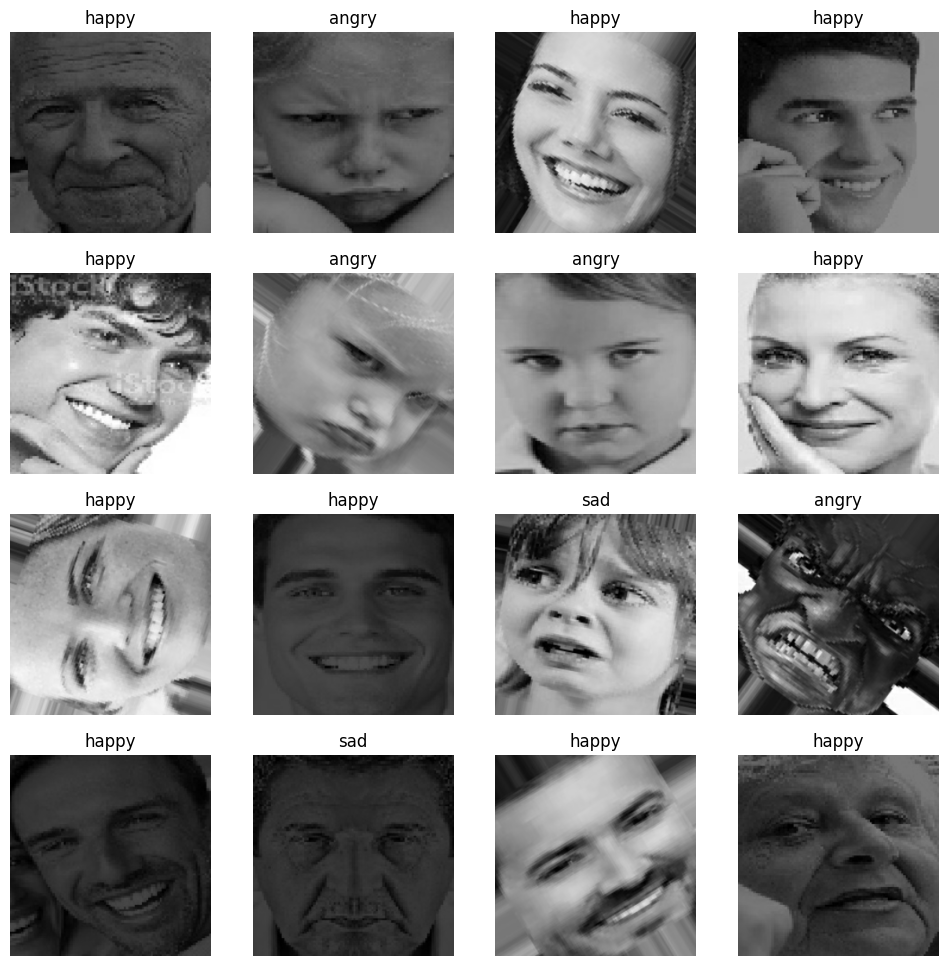

In [21]:
plt.figure(figsize = (12, 12))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    plt.title(CLASS_NAMES[tf.argmax(labels[i], axis = 0).numpy()])
    plt.axis('off')

## Data Preparation

Prepare efficient data pipelines for training.

In [23]:
resize_rescaling_layers = tf.keras.Sequential([
    Resizing(CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']),
    Rescaling(1./255)
])

In [ ]:
# Prepare efficient data pipelines
training_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
validation_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)
